In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data into pandas dataframe
kick_data = pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter002.csv")
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter003.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter004.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter005.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter006.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter007.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter008.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter009.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter010.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter011.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter012.csv"))

# Isolate relevant attributes
kick_data = kick_data.loc[:, ['backers_count','blurb','category','country', 'goal', 
                              'staff_pick', 'state', 'usd_pledged']]

# keep only successful and failed entries
kick_data = kick_data[kick_data.state != 'live']
kick_data = kick_data[kick_data.state != 'canceled']
kick_data = kick_data[kick_data.state != 'suspended']

# remove rows with missing values
kick_data = kick_data.dropna()

# reset index for model-building and to remove duplicate values
kick_data = kick_data.reset_index(drop=True)

# add column for average amount pledged per backer
kick_data['usd_per_backer'] = kick_data['usd_pledged']/kick_data['backers_count']

kick_data.tail()

,backers_count,blurb,category,country,goal,staff_pick,state,usd_pledged,usd_per_backer
38344,149,A cheeky little card game of face-stuffing ham...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",GB,1500.0,False,successful,4153.527953,27.876027
38345,44,"A high-quality, hand-built tap tempo delay ped...","{""id"":339,""name"":""Sound"",""slug"":""technology/so...",CA,8000.0,True,successful,11266.636702,256.059925
38346,473,A Superhero RPG for the 21st Century!,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",US,28000.0,False,successful,34332.500000,72.584567
38347,52,"The new series ""Fabulous High"" needs your back...","{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",US,5000.0,False,successful,6510.000000,125.192308
38348,41,"Low-brow art, stickers and prints influenced b...","{""id"":22,""name"":""Illustration"",""slug"":""art/ill...",US,1200.0,False,successful,1367.000000,33.341463


In [24]:
kick_data["category"].nunique()

169

In [25]:
# Count entries per value in country column
kick_data['country'].value_counts()

US    27348
GB     4227
CA     1828
AU      857
DE      584
FR      517
MX      413
IT      406
ES      354
NL      337
SE      242
DK      195
HK      179
NZ      163
SG      144
IE      114
BE      109
CH      108
AT       79
NO       71
JP       67
LU        7
Name: country, dtype: int64

In [26]:
kick_data["state"].value_counts()

successful    23387
failed        14962
Name: state, dtype: int64

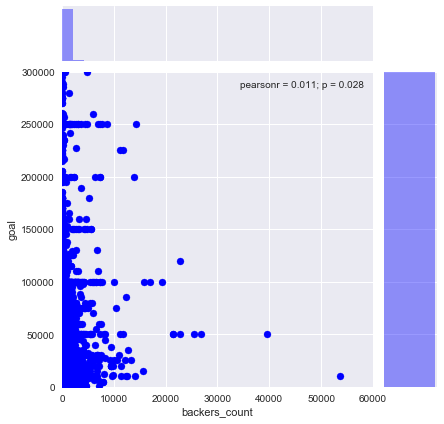

In [44]:
# Construct seaborn jointplot, limit axis so that pattern can be seen
plot = sns.jointplot(data=kick_data, x='backers_count', y='goal', color='b')
plot.ax_marg_x.set_xlim(0, 60000)
plot.ax_marg_y.set_ylim(0, 300000)
plt.show()

In [28]:
# state values changed to integers for correlation analysis
kick_data.loc[:,"state"] = kick_data.loc[:,"state"].apply(lambda x: 1 if x == 'successful' else 0)
# check that state values are int
kick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38349 entries, 0 to 38348
Data columns (total 9 columns):
backers_count     38349 non-null int64
blurb             38349 non-null object
category          38349 non-null object
country           38349 non-null object
goal              38349 non-null float64
staff_pick        38349 non-null bool
state             38349 non-null int64
usd_pledged       38349 non-null float64
usd_per_backer    35362 non-null float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 2.4+ MB


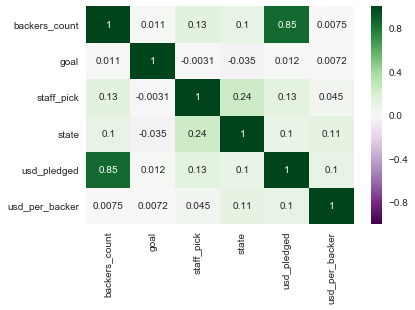

In [29]:
# Construct seaborn heatmap to get correlations between attributes
sns.heatmap(kick_data.corr(), annot=True, cmap='PRGn')
plt.show()

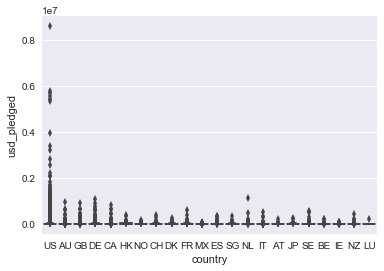

In [30]:
# Construct seaborn boxplot to see how country affects how much is pledged
sns.boxplot(x="country", y="usd_pledged", data=kick_data)
plt.show()

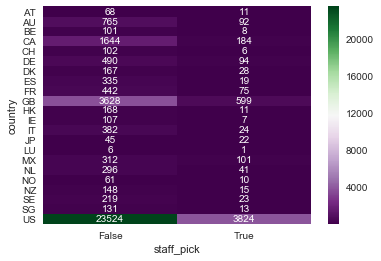

In [31]:
# Count entries per country based on staff_pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', aggfunc='size')
sns.heatmap(kick_pt, annot=True, fmt=".0f", cmap = "PRGn")
plt.show()

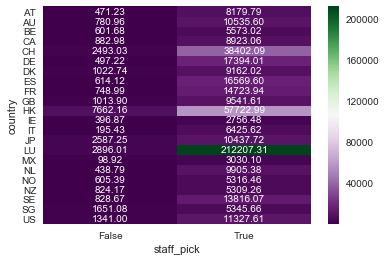

In [32]:
# Construct heatmap to show median value of usd_pledged based on country and staff pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', values='usd_pledged', aggfunc=np.median)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")
plt.show()

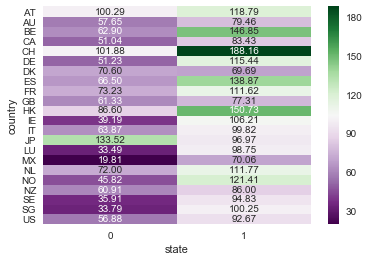

In [45]:
# Construct heatmap to show average value of usd_per_backer based on country and state
# state of 1 is successful, 0 is failed
kick_pt = kick_data.pivot_table(index='country', columns='state', values='usd_per_backer', aggfunc=np.mean)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")
plt.show()